In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/mood_prediction_dataset.csv')

In [ ]:
print("First 5 rows of the dataset:")

First 5 rows of the dataset:


In [ ]:
print(df.head())

   Sleep_Hours  Screen_Time_Hrs  Exercise_Mins  Healthy_Meals  \
0            9                2              1              3   
1            5                3             47              1   
2            9                9              5              4   
3            4                2             13              2   
4            8                1             35              2   

   Social_Interactions     Mood  
0                    3    Happy  
1                   10    Happy  
2                    0  Neutral  
3                    8    Happy  
4                   10    Happy  


In [ ]:
le = LabelEncoder()

In [ ]:
df['Mood_Label'] = le.fit_transform(df['Mood'])  # Happy=0, Neutral=1, Sad=2

In [ ]:
X = df[['Sleep_Hours', 'Screen_Time_Hrs', 'Exercise_Mins', 'Healthy_Meals', 'Social_Interactions']]

In [ ]:
y = df['Mood_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

       Happy       0.79      0.92      0.85        12
     Neutral       0.40      0.40      0.40         5
         Sad       1.00      0.33      0.50         3

    accuracy                           0.70        20
   macro avg       0.73      0.55      0.58        20
weighted avg       0.72      0.70      0.68        20



In [ ]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: >

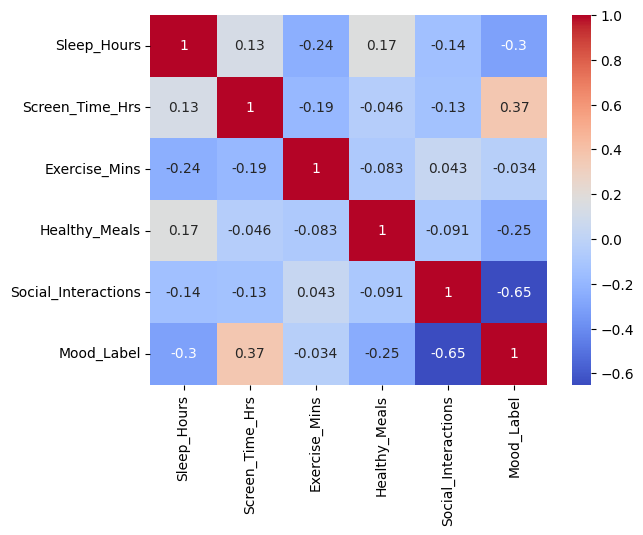

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Feature Correlation')

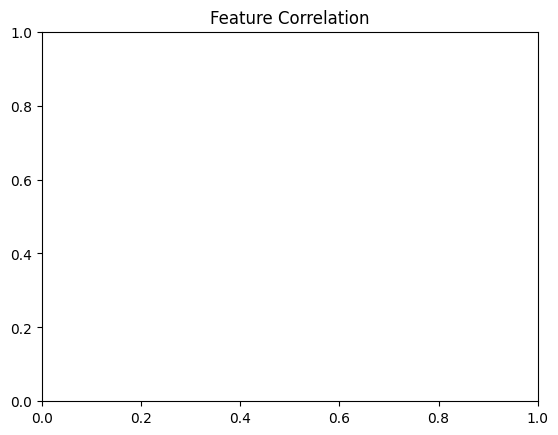

In [ ]:
plt.title("Feature Correlation")

In [ ]:
plt.show()

In [ ]:
sample = pd.DataFrame({
    'Sleep_Hours': [7],
    'Screen_Time_Hrs': [3],
    'Exercise_Mins': [20],
    'Healthy_Meals': [3],
    'Social_Interactions': [5]
})

In [ ]:
pred = model.predict(sample)

In [ ]:
print("Predicted Mood for sample input:", le.inverse_transform(pred)[0])

Predicted Mood for sample input: Happy


In [ ]:
import joblib

In [ ]:
import pandas as pd

data = {
    'SleepHours': [7, 5, 6, 8, 4],
    'ExerciseMins': [30, 10, 45, 60, 0],
    'WaterIntake': [2.0, 1.0, 2.5, 3.0, 1.2],
    'StressLevel': [3, 7, 4, 2, 8],
    'Mood': ['Happy', 'Sad', 'Calm', 'Happy', 'Angry']
}

df = pd.DataFrame(data)
df.to_csv('mood_dataset.csv', index=False)
df.head()


SleepHours  ExerciseMins  WaterIntake  StressLevel   Mood
0           7            30          2.0            3  Happy
1           5            10          1.0            7    Sad
2           6            45          2.5            4   Calm
3           8            60          3.0            2  Happy
4           4             0          1.2            8  Angry

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the data
df = pd.read_csv('mood_dataset.csv')

# Encode Mood
le = LabelEncoder()
df['Mood'] = le.fit_transform(df['Mood'])

# Split data
X = df.drop('Mood', axis=1)
y = df['Mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
joblib.dump(model, 'mood_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
# Example input (SleepHours, ExerciseMins, WaterIntake, StressLevel)
user_input = [[6, 30, 2.0, 5]]

# Load model & encoder
loaded_model = joblib.load('mood_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

# Predict
prediction = loaded_model.predict(user_input)
predicted_mood = loaded_encoder.inverse_transform(prediction)

print("Predicted Mood:", predicted_mood[0])


Predicted Mood: Happy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Create the mood dataset
data = {
    'SleepHours': [7, 5, 6, 8, 4, 6, 7, 5, 8, 4],
    'ExerciseMins': [30, 10, 45, 60, 0, 20, 50, 15, 55, 5],
    'WaterIntake': [2.0, 1.0, 2.5, 3.0, 1.2, 2.1, 2.8, 1.5, 3.1, 1.0],
    'StressLevel': [3, 7, 4, 2, 8, 5, 2, 6, 1, 7],
    'Mood': ['Happy', 'Sad', 'Calm', 'Happy', 'Angry', 'Calm', 'Happy', 'Sad', 'Happy', 'Angry']
}

df = pd.DataFrame(data)

# Save as CSV
df.to_csv('mood_dataset.csv', index=False)

# Display it
df.head()


SleepHours  ExerciseMins  WaterIntake  StressLevel   Mood
0           7            30          2.0            3  Happy
1           5            10          1.0            7    Sad
2           6            45          2.5            4   Calm
3           8            60          3.0            2  Happy
4           4             0          1.2            8  Angry

In [ ]:
from google.colab import files
files.download('mood_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'mood_model.pkl')

# Save the label encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
import joblib

In [ ]:
from google.colab import files

In [ ]:
from google.colab import files

files.download('mood_model.pkl')         # download model
files.download('label_encoder.pkl')      # download label encoder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>